# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: 1 - mandakini</h1></font>

### Question 1: Which States reacted most/least aggressively to COVID (largest change in travel patterns before and after COVID)? Compare individual stateâ€™s pattern with nationwide data.

#### 1) Time Series of COVID Cases, total death, population staying at home, population not staying at home (Overlay 2019, 2020 and 2021) in USA
#### 2)  i)Time Series of COVID Cases, total death, population staying at home, population not staying at home (Overlay 2019, 2020 and 2021) in CA 
####      ii) Time Series of COVID Cases, total death, population staying at home, population not staying at home (Overlay 2019, 2020 and 2021) in VT

#### 3) State Specific Bar Graph showing travel before / travel after , potentially all 50 states

#### 4) Change in percentage of travel -statewise    

### Q2. How did COVID change the nature / length of travel?

#### 5) Time Series of Trip Type over Time (Nationally)                                                                   Owner: Mandakini

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [2]:
#read data file
path = "output_data/consolidated_new.csv"
consolidated_covid_df = pd.read_csv(path, encoding="UTF-8")


# 1.Time Series of COVID Cases, total death, population staying at home, population not staying at home (Overlay 2019, 2020 and 2021) in USA

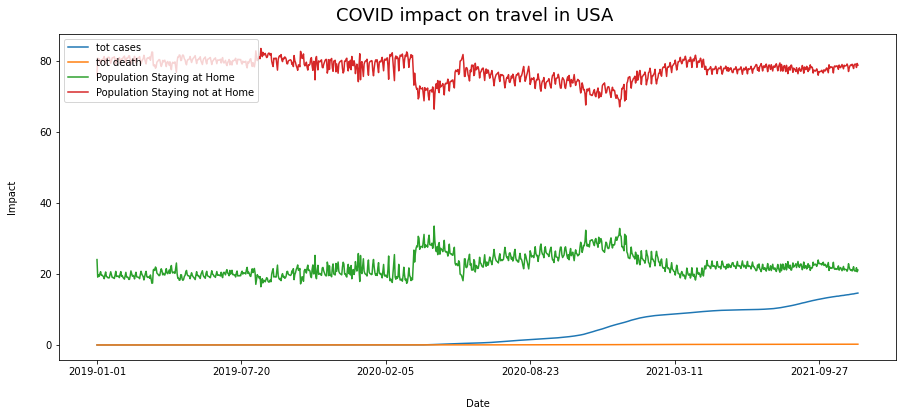

In [3]:
# preparing dataframes 

N1 = consolidated_covid_df.groupby("Date",as_index = False)["tot_cases%"].mean() 
N1_df = pd.DataFrame(N1)

N2 = consolidated_covid_df.groupby("Date",as_index = False)['tot_death%'].mean() 
N2_df = pd.DataFrame(N2)

N3 =  consolidated_covid_df.groupby("Date",as_index = False)['Population Staying at Home%'].mean() 
N3_df = pd.DataFrame(N3)

N4 =  consolidated_covid_df.groupby("Date",as_index = False)['Population Not Staying at Home%'].mean() 
N4_df = pd.DataFrame(N4)

# plotting line graph

N1_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="tot cases")
N2_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="tot death")
N3_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Population Staying at Home")
N4_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Population Staying not at Home")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in USA ",y=1.02,fontsize=18)
plt.savefig("Images/covid_impact_USA.png")
plt.show()


## 2) Time Series of COVID Cases, total death, population staying at home, population not staying at home (Overlay 2019, 2020 and 2021) in CA ,VT

In [4]:
#Which States reacted most/least aggressively to COVID
#(Pick 2 states, e.g. CA, VT)

#preparing dataframe
CA_df = consolidated_covid_df.loc[(consolidated_covid_df['state'] == 'CA')]
VT_df = consolidated_covid_df.loc[(consolidated_covid_df['state'] == 'VT')]

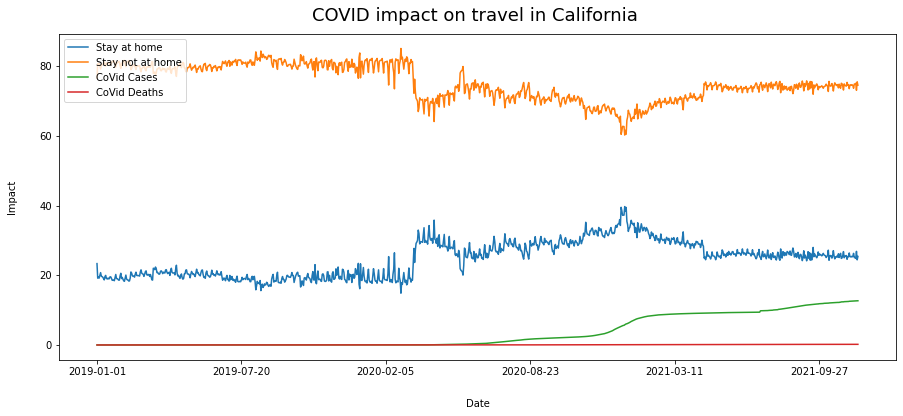

In [5]:
#plot line graph for CA
CA_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Stay at home")
CA_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Stay not at home")
CA_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="CoVid Cases")
CA_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="CoVid Deaths")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in California ",y=1.02,fontsize=18)
plt.savefig("Images/covid_impact_CA.png")
plt.show()

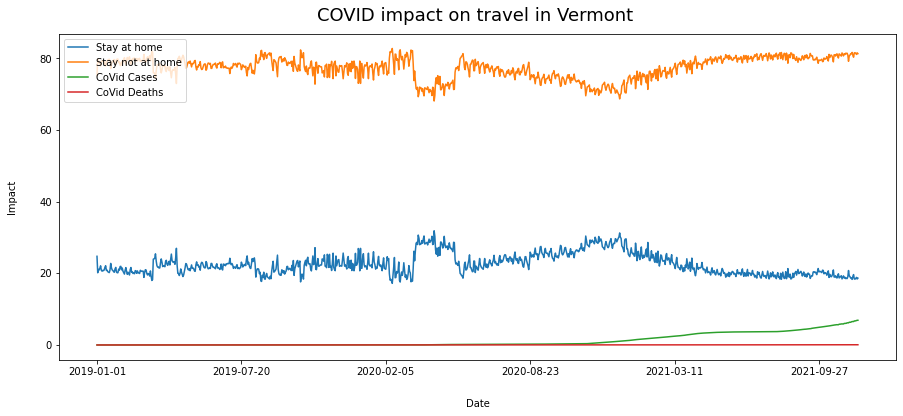

In [6]:
#plot line graph for VT
VT_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Stay at home")
VT_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Stay not at home")
VT_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="CoVid Cases")
VT_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="CoVid Deaths")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in Vermont ",y=1.02,fontsize=18)
plt.savefig("Images/covid_impact_VT.png")
plt.show()

## 3. State Specific Bar Graph showing travel before / travel after potentially all 50 states

In [7]:


#Adding a new column "covid_status" according  to "Date" ,if date is before 2020/01/21 status is before otherwise after

consolidated_covid_df["covid_status"] = np.where(consolidated_covid_df["Date"]>'2020/01/21 status is ',"after","before")

consolidated_covid_df.head(3)

,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%,covid_status
0,MO,0,NaN,0,NaN,2019-01-01,1530765.0,4576960.0,16618431.0,4033851.0,...,290444.0,154169.0,39949.0,29170.0,6107725.0,0.0,0.0,25.062769,74.937231,before
1,LA,0,NaN,0,NaN,2019-01-01,1042471.0,3603260.0,13635299.0,3737562.0,...,249210.0,97879.0,22007.0,14093.0,4645731.0,0.0,0.0,22.439332,77.560668,before
2,AZ,0,NaN,0,NaN,2019-01-01,1721026.0,5428700.0,18705619.0,5351386.0,...,278933.0,190394.0,39342.0,43397.0,7149726.0,0.0,0.0,24.071216,75.928784,before


In [8]:
# groupby  Number of Trips on state and covid_status ,use sum function to generate following dataframe "covid_vs_trips_df"
#"covid_vs_trips_df" with columns state,covid_status,Number of Trips
x = consolidated_covid_df.groupby(["state","covid_status"],as_index = False)['Number of Trips'].sum()
covid_vs_trips_df = pd.DataFrame(x)

In [9]:
covid_vs_trips_df

,state,covid_status,Number of Trips
0,AK,after,9.103217e+08
1,AK,before,2.007567e+09
2,AL,after,5.675018e+09
3,AL,before,1.189436e+10
4,AR,after,3.404353e+09
...,...,...,...
97,WI,before,1.520846e+10
98,WV,after,2.109076e+09
99,WV,before,4.455022e+09
100,WY,after,8.282265e+08


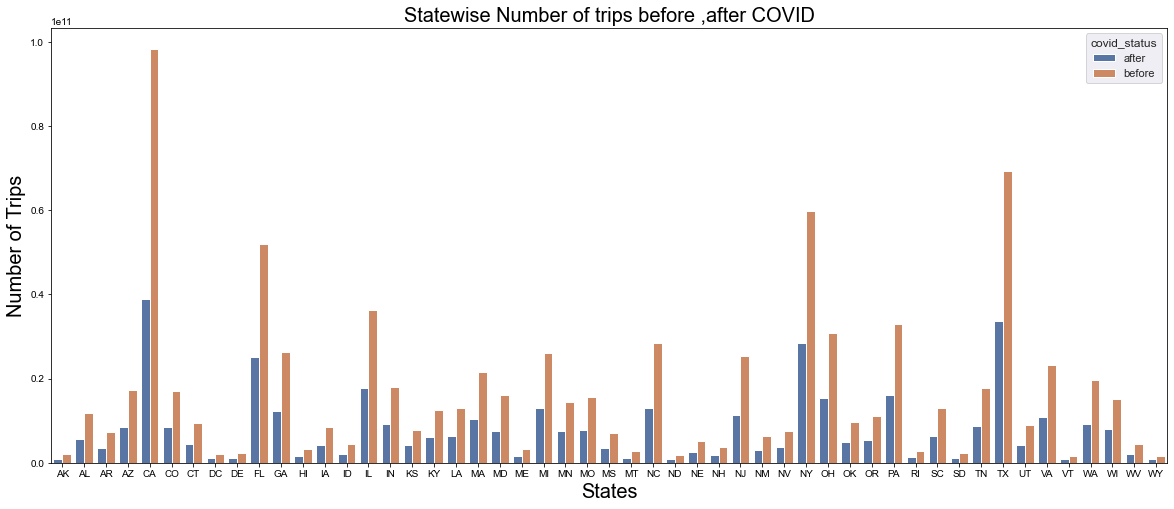

In [10]:
#plot bar graph
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set()
p = sns.barplot(x="state", y="Number of Trips",data = covid_vs_trips_df,hue='covid_status',ax=ax)
p.set_xlabel("States", fontsize = 20)
p.set_ylabel("Number of Trips", fontsize = 20)
p.set_title("Statewise Number of trips before ,after COVID", fontsize = 20)

plt.savefig("Images/state_wise_trips.png")


## 4) Time Series of Trip Type over Time (Nationally)

In [11]:
#Read data
national_trip_data = "output_data/national_covid.csv"

In [12]:
#preparing dataframe
national_trip_data = pd.read_csv(national_trip_data, encoding="UTF-8")

In [13]:
national_trip_data.head(3)

,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2019/01/01,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0
1,2019/01/02,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0
2,2019/01/03,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0


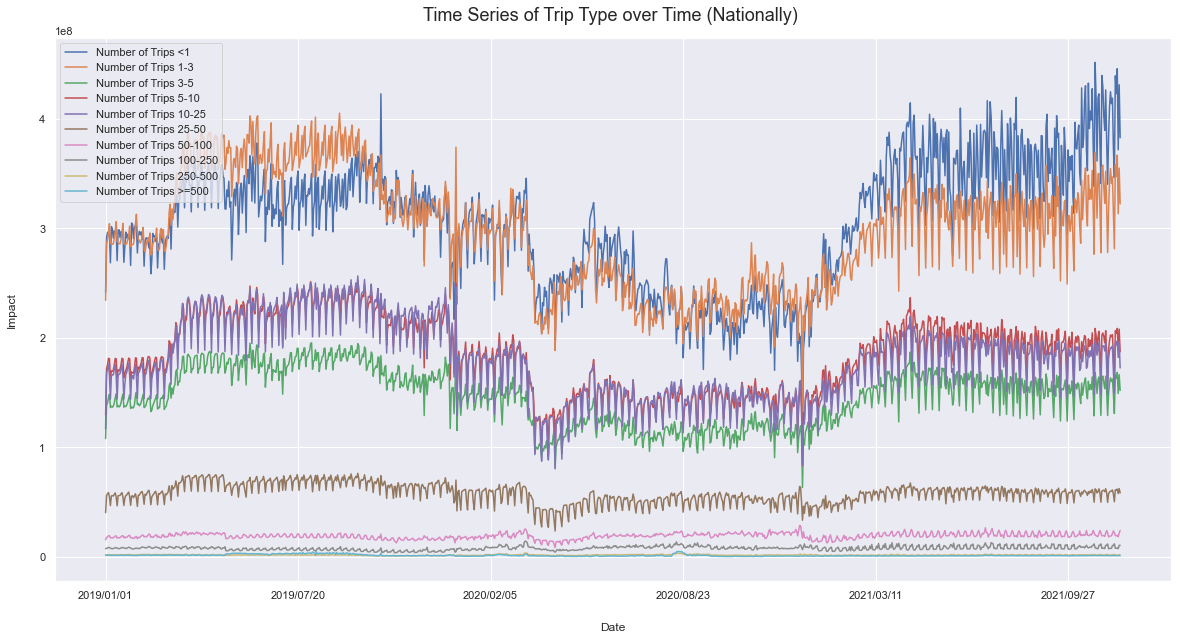

In [14]:
# plot line graph for different trip type with date

national_trip_data.set_index('Date')['Number of Trips <1'].plot(figsize =(20,10),label="Number of Trips <1")
national_trip_data.set_index('Date')['Number of Trips 1-3'].plot(figsize =(20,10),label="Number of Trips 1-3")
national_trip_data.set_index('Date')['Number of Trips 3-5'].plot(figsize =(20,10),label="Number of Trips 3-5")
national_trip_data.set_index('Date')['Number of Trips 5-10'].plot(figsize =(20,10),label="Number of Trips 5-10")
national_trip_data.set_index('Date')['Number of Trips 10-25'].plot(figsize =(20,10),label="Number of Trips 10-25")
national_trip_data.set_index('Date')['Number of Trips 25-50'].plot(figsize =(20,10),label="Number of Trips 25-50")
national_trip_data.set_index('Date')['Number of Trips 50-100'].plot(figsize =(20,10),label="Number of Trips 50-100")
national_trip_data.set_index('Date')['Number of Trips 100-250'].plot(figsize =(20,10),label="Number of Trips 100-250")
national_trip_data.set_index('Date')['Number of Trips 250-500'].plot(figsize =(20,10),label="Number of Trips 250-500")
national_trip_data.set_index('Date')['Number of Trips >=500'].plot(figsize =(20,10),label="Number of Trips >=500")


plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("Time Series of Trip Type over Time (Nationally) ",y=1.02,fontsize=18)
plt.savefig("Images/Trip_Type_USA.png")
plt.show()

## 5) Change in percentage of travel COVID before - COVID after -Statewise

In [15]:
#before covid number of trips statewise
covid_before_trips_df = covid_vs_trips_df.loc[(covid_vs_trips_df['covid_status'] == 'before')]
covid_before_trips_df = covid_before_trips_df.rename(columns={'Number of Trips': 'Number of Trips_before'})
covid_before_trips_df.head(3)

,state,covid_status,Number of Trips_before
1,AK,before,2.007567e+09
3,AL,before,1.189436e+10
5,AR,before,7.331032e+09


In [16]:
#after covid number of trips statewise
covid_after_trips_df = covid_vs_trips_df.loc[(covid_vs_trips_df['covid_status'] == 'after')]
covid_after_trips_df = covid_after_trips_df.rename(columns={'Number of Trips': 'Number of Trips_after'})
covid_after_trips_df.head(3)

,state,covid_status,Number of Trips_after
0,AK,after,9.103217e+08
2,AL,after,5.675018e+09
4,AR,after,3.404353e+09


In [17]:
#combined dataframe containing Number of trips before covid and Number of trips after covid
covid_vs_trip_before_after = covid_before_trips_df.merge(covid_after_trips_df, left_on='state', right_on='state', how = "inner")

In [18]:
covid_vs_trip_before_after.head(3)

,state,covid_status_x,Number of Trips_before,covid_status_y,Number of Trips_after
0,AK,before,2.007567e+09,after,9.103217e+08
1,AL,before,1.189436e+10,after,5.675018e+09
2,AR,before,7.331032e+09,after,3.404353e+09


In [19]:
covid_vs_trip_before_after = covid_vs_trip_before_after.drop(columns=['covid_status_x', 'covid_status_y'])

In [20]:
covid_vs_trip_before_after.head(3)

,state,Number of Trips_before,Number of Trips_after
0,AK,2.007567e+09,9.103217e+08
1,AL,1.189436e+10,5.675018e+09
2,AR,7.331032e+09,3.404353e+09


In [21]:
#change_in_% of trips after covid = Number of Trips_after -Number of Trips_before / Number of Trips_before *100
covid_vs_trip_before_after['change_in_%']=(covid_vs_trip_before_after['Number of Trips_after']-covid_vs_trip_before_after['Number of Trips_before'] )/ covid_vs_trip_before_after['Number of Trips_before']  * 100

In [22]:
covid_vs_trip_before_after.head(3)

,state,Number of Trips_before,Number of Trips_after,change_in_%
0,AK,2.007567e+09,9.103217e+08,-54.655468
1,AL,1.189436e+10,5.675018e+09,-52.288169
2,AR,7.331032e+09,3.404353e+09,-53.562434


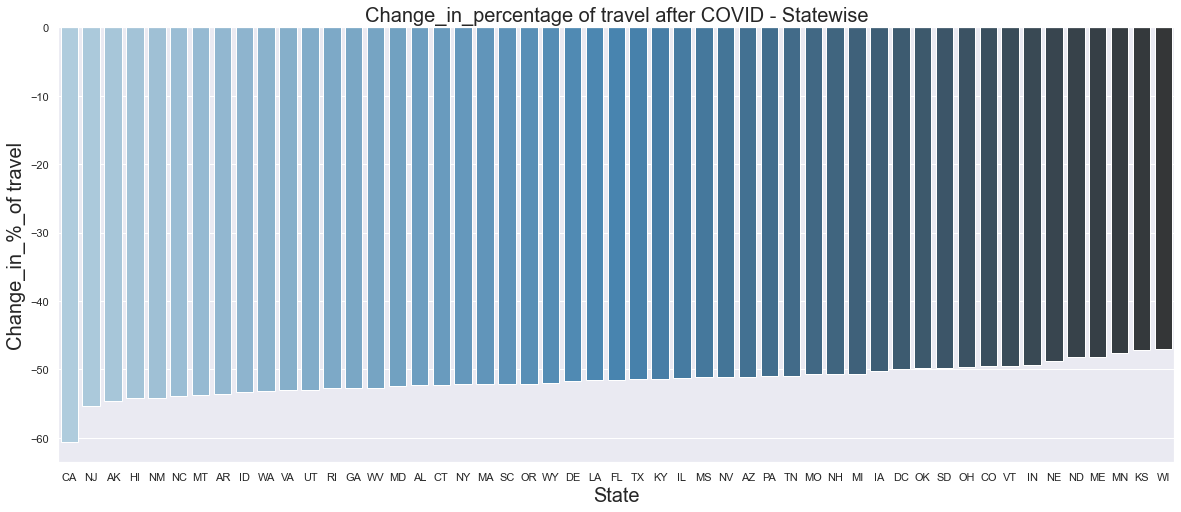

In [23]:
# generate graph

#sort data
covid_vs_trip_before_after.sort_values('change_in_%',inplace=True)

fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set()
p = sns.barplot(x="state", y="change_in_%",data = covid_vs_trip_before_after,ax=ax,palette="Blues_d")
p.set_xlabel("State", fontsize = 20)
p.set_ylabel("Change_in_%_of travel", fontsize = 20)
p.set_title("Change_in_percentage of travel after COVID - Statewise", fontsize = 20)

plt.savefig("Images/change_in_percentage_of_travel_statewise.png")

<hr><font color="green"><h1>from file: 2 - etienne</h1></font>

###: this file should read the data from consolidated.csv

###:this should do all of the analysis

### :General Note - Any Analysis that can be done for cases can be done for deaths, although cases might be easier because the data aren't lagged
Timeframe - Jan 2019 - Today
"Pre COVID" = Jan 2019 - Mar 2020


**Question 1: How did COVID Change Overall Travel Patterns?**

1) Plot 1: Scatter Plot (Points = States, X-Axis = Travel Volume, Y-Axis = Cases)

2) Plot 2: Line Graph (X-Axis = Time, Y-Axis = Travel Volume, COVID Cases)

**Question 2: Which States reacted most/least aggressively to COVID (largest change in travel patterns)**

1) Plot 1: (Pick 2 states, e.g. CA, TX) - Time Series of COVID Cases and Travel Volume (Overlay 2019 and 2020)

2) Plot 2: State Specific Bar Graph showing travel before / travel after (FL - 80% / 60% "pop not stay at home"), potentially all 50 states

**Question 3: How did COVID change the nature / length of travel?**

1) Plot 1: Time Series of Trip Type over Time (Nationally)

2) Plot 2: Scatter Plot of Counties that Changed the Most

**Question 4: Did Reducing Travel Reduce COVID**

1) Plot 1: Bar graph (by state) PRE-COVID Trips vs. COVID Trips (timeframe TBD)

2) Plot 2: TBD


In [24]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [25]:
path = "output_data/consolidated_new.csv"
covid_df = pd.read_csv(path)
covid_df

,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%
0,MO,0,NaN,0,NaN,2019-01-01,1530765.0,4576960.0,16618431.0,4033851.0,...,809030.0,290444.0,154169.0,39949.0,29170.0,6107725.0,0.000000,0.000000,25.062769,74.937231
1,LA,0,NaN,0,NaN,2019-01-01,1042471.0,3603260.0,13635299.0,3737562.0,...,530891.0,249210.0,97879.0,22007.0,14093.0,4645731.0,0.000000,0.000000,22.439332,77.560668
2,AZ,0,NaN,0,NaN,2019-01-01,1721026.0,5428700.0,18705619.0,5351386.0,...,865350.0,278933.0,190394.0,39342.0,43397.0,7149726.0,0.000000,0.000000,24.071216,75.928784
3,AR,0,NaN,0,NaN,2019-01-01,642665.0,2361951.0,7488494.0,1715475.0,...,347585.0,154771.0,67697.0,16563.0,7904.0,3004616.0,0.000000,0.000000,21.389256,78.610744
4,CA,0,NaN,0,NaN,2019-01-01,9212440.0,30223696.0,111648618.0,33567702.0,...,5318558.0,2111397.0,750377.0,178478.0,214788.0,39436136.0,0.000000,0.000000,23.360402,76.639598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53800,SD,162375,0.0,2305,0.0,2021-11-20,171947.0,712712.0,3636567.0,1091024.0,...,178228.0,100882.0,49912.0,5480.0,2510.0,884659.0,18.354530,0.260552,19.436529,80.563471
53801,CA,5014428,0.0,73000,0.0,2021-11-20,10043294.0,29468929.0,123467116.0,34174699.0,...,6447071.0,2787076.0,1054817.0,234871.0,134765.0,39512223.0,12.690827,0.184753,25.418195,74.581805
53802,OH,1639070,5590.0,26063,0.0,2021-11-20,2448434.0,9240666.0,52206417.0,15961931.0,...,1923585.0,785995.0,319374.0,45441.0,29849.0,11689100.0,14.022209,0.222968,20.946300,79.053700
53803,UT,582929,0.0,3428,0.0,2021-11-20,716625.0,2489333.0,12783889.0,3492150.0,...,667482.0,225500.0,99433.0,29599.0,16726.0,3205958.0,18.182677,0.106926,22.352913,77.647087


In [26]:
CA_COVID_1 = covid_df[covid_df['state']== "CA"]
CA_COVID_2 = CA_COVID_1[CA_COVID_1['tot_cases']!= 0]
CA_COVID_3 = CA_COVID_2.dropna()
CA_COVID_3.head()

,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%
20247,CA,3,3.0,0,0.0,2020-02-02,8674130.0,30882915.0,120969857.0,32769671.0,...,5779739.0,2224657.0,880903.0,214320.0,147714.0,39557045.0,0.000008,0.0,21.928155,78.071845
20337,CA,6,3.0,0,0.0,2020-02-03,7516164.0,32040881.0,137082176.0,37437085.0,...,7226417.0,2406472.0,860342.0,205845.0,154855.0,39557045.0,0.000015,0.0,19.000823,80.999177
20368,CA,6,0.0,0,0.0,2020-02-04,7404908.0,32152137.0,137334133.0,37302419.0,...,7365334.0,2429285.0,792546.0,198781.0,159265.0,39557045.0,0.000015,0.0,18.719568,81.280432
20434,CA,6,0.0,0,0.0,2020-02-05,7389989.0,32167056.0,140458490.0,38769455.0,...,7324225.0,2416066.0,788039.0,210519.0,165528.0,39557045.0,0.000015,0.0,18.681853,81.318147
20458,CA,6,0.0,0,0.0,2020-02-06,7369817.0,32187228.0,142169443.0,39324618.0,...,7431876.0,2447328.0,790135.0,215653.0,164722.0,39557045.0,0.000015,0.0,18.630858,81.369142


In [27]:
TX_COVID_1 = covid_df[covid_df['state']== "TX"]
TX_COVID_2 = TX_COVID_1[TX_COVID_1['tot_cases']!= 0]
TX_COVID_3 = TX_COVID_2.dropna()

<AxesSubplot:>

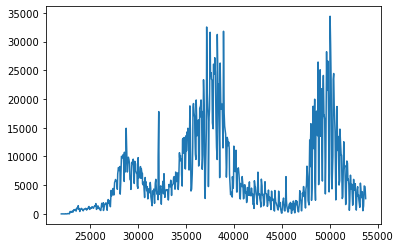

In [8]:
TX_COVID_3['new_case'].plot()

In [9]:
import seaborn as sns
from IPython.display import display
plot_data = {}
for state in ['CA',"TX","IL","NY","FL"]:
    df = covid_df[covid_df.state == state]
    df.index = pd.to_datetime(df.Date)
    plot_data[state] = df[['new_case','Number of Trips']].dropna()


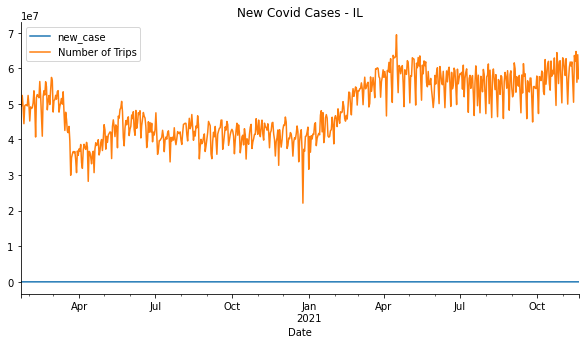

In [11]:
plot_data['IL'].plot(label='IL',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - IL')
plt.legend()

In [12]:
tx = plot_data['TX']
tx['month'] = tx.index.month

In [13]:
tx

,new_case,Number of Trips,month
Date,,,
2020-01-22,0.0,94342336.0,1
2020-01-23,0.0,100218909.0,1
2020-01-24,0.0,107179008.0,1
2020-01-25,0.0,97779266.0,1
2020-01-26,0.0,87097238.0,1
...,...,...,...
2021-11-16,4301.0,109844231.0,11
2021-11-17,4867.0,114412236.0,11
2021-11-18,4744.0,99736696.0,11


In [14]:
txdiff = tx.diff()

In [15]:
txdiff['month'] = tx['month']

Text(0.5, 1.0, 'Texas New Cases vs. Trips (month by month)')

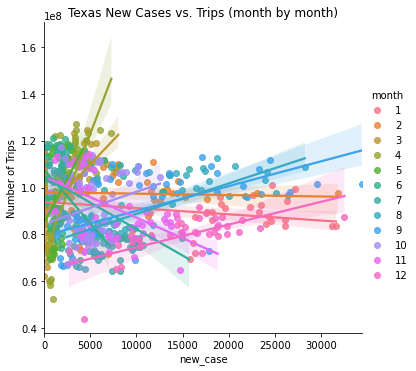

In [16]:

sns.lmplot(
    data=tx,
    x="new_case", y='Number of Trips', hue="month",
    height=5
)
plt.title("Texas New Cases vs. Trips (month by month)")

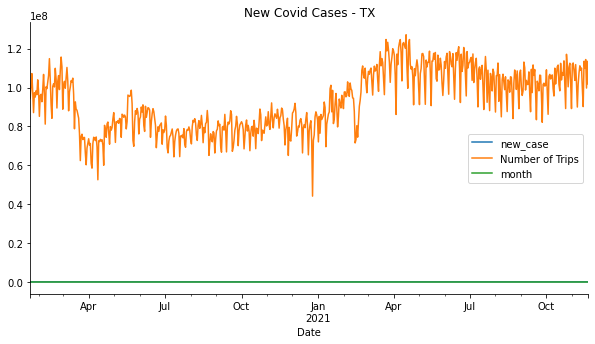

In [13]:
plot_data['TX'].plot(label='TX',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - TX')
plt.legend()

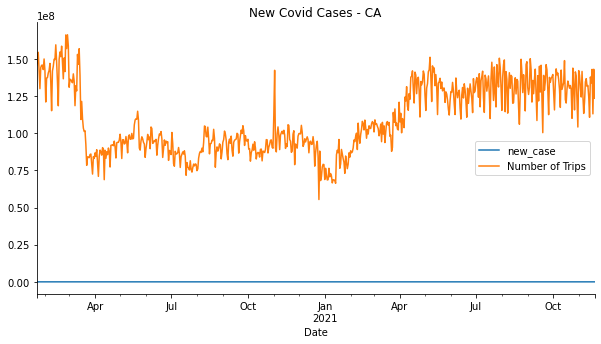

In [14]:
plot_data['CA'].plot(label='CA',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - CA')
plt.legend();

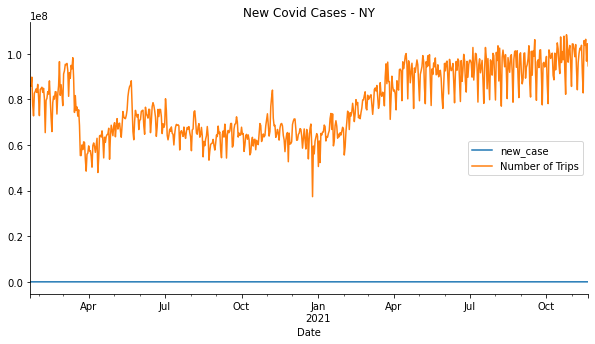

In [15]:
plot_data['NY'].plot(label='NY',figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - NY')
plt.legend();

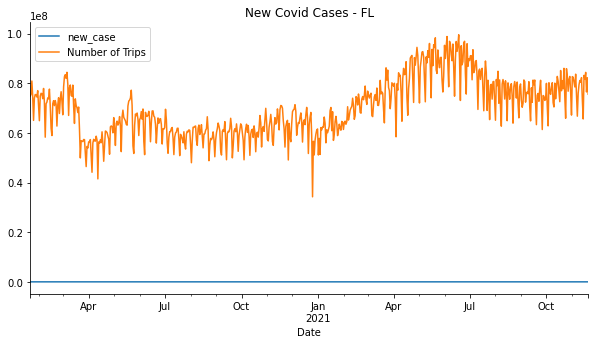

In [16]:
plot_data['FL'].plot(label="FL",figsize=(10,5))
sns.despine()
plt.title('New Covid Cases - FL')
plt.legend();

In [ ]:
frame = pd.DataFrame()
for key in plot_data.keys():
    frame[key] = plot_data[key]

In [ ]:
frame.plot(subplots=True)

In [ ]:
differenced = frame.diff()

In [ ]:
pd.plotting.scatter_matrix(frame,figsize=(12,8));
plt.title('Daily Change in New Cases - State vs. State')

In [ ]:
frame['day'] = frame.index.day_name()

In [ ]:
frame['month'] = frame.index.month

In [ ]:
sns.pairplot(frame,kind="reg",hue='day')

In [ ]:
sns.pairplot(frame,hue='day')
sns.color_palette("hls", 8);


In [ ]:
frame2 = frame[['CA', 'TX', 'IL', 'NY', 'FL', 'dtime']]

In [ ]:
frame.columns

In [ ]:
frame['dtime'] = frame.index

In [ ]:
sns.pairplot(frame2,hue='dtime',palette='viridis', diag_kind=None)
# sns.color_palette("flare", as_cmap=True)
# sns.color_palette("viridis", as_cmap=True);

In [ ]:
frame

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
frame2['dtime'] = frame2.dtime.astype('str')

In [ ]:
sns.lmplot(
    data=frame,
    x="NY", y="FL", hue="month",
    height=5
)

In [ ]:
sns.lmplot(
    data=frame,
    x="IL", y="TX", hue="month",
    height=5
)

In [ ]:
states = ['CA', 'TX', 'IL', 'NY', 'FL']

In [ ]:
frame[states].rolling(7).mean().plot()

In [ ]:
detrended = frame[states].rolling(7).mean()

In [ ]:
detrended['month'] = frame.month

In [ ]:
sns.lmplot(
    data=detrended,
    x="IL", y="TX", hue="month",
    height=5
)

In [ ]:
sns.lmplot(
    data=detrended,
    x="NY", y="FL", hue="month",
    height=5
)

<hr><font color="green"><h1>from file: 3 - gus</h1></font>

**Description of Basic Responses to COVID In Terms of Travel Patterns (National, Extra Interesting Descriptive)**
Owner: Etienne, Gus

1) Plot 1: Scatter Plot (Points = States, X-Axis = Travel Volume, Y-Axis = Cases)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


path = "output_data/consolidated_new.csv"
covid_df = pd.read_csv(path)
covid_df

#Subset the data for the California state by selectin state that has the code "CA"
CA_COVID_1 = covid_df[covid_df['state']== "CA"]

#Remove any row that has zero total cases, this will mark when Covid Happened
CA_COVID_2 = CA_COVID_1[CA_COVID_1['tot_cases']!= 0]


# Adding lag to the number of people people staying home after the dead is reported
CA_COVID_2['Population_Staying_at_Home_1days'] = CA_COVID_2['Population Staying at Home'].shift(periods=1)
CA_COVID_2['Population_Staying_at_Home_3days'] = CA_COVID_2['Population Staying at Home'].shift(periods=3)
CA_COVID_2['Population_Staying_at_Home_5days'] = CA_COVID_2['Population Staying at Home'].shift(periods=5)
CA_COVID_2['Population_Staying_at_Home_7days'] = CA_COVID_2['Population Staying at Home'].shift(periods=7)
CA_COVID_2['Population_Staying_at_Home_9days'] = CA_COVID_2['Population Staying at Home'].shift(periods=9)
CA_COVID_2['Population_Staying_at_Home_11days'] = CA_COVID_2['Population Staying at Home'].shift(periods=11)
CA_COVID_2['Population_Staying_at_Home_13days'] = CA_COVID_2['Population Staying at Home'].shift(periods=13)

CA_COVID_3 = CA_COVID_2[CA_COVID_2['new_death']>0]
CA_COVID_4 = CA_COVID_3.dropna()


<ipython-input-1-7c5455406da9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_COVID_2['Population_Staying_at_Home_1days'] = CA_COVID_2['Population Staying at Home'].shift(periods=1)
<ipython-input-1-7c5455406da9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_COVID_2['Population_Staying_at_Home_3days'] = CA_COVID_2['Population Staying at Home'].shift(periods=3)
<ipython-input-1-7c5455406da9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

1. Determine the number of day after Case or Death Reporting that affect the number of people staying at home.
2. Determine whether "New Case" or "New Death" has more impact on the population staying at home.

In [2]:
#running the Pearson R value to check which lag days has the strongest correlation between number of death report and number of people staying at home x days after reporting.

correlation_CA_1 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_1days'])
correlation_CA_3 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_3days'])
correlation_CA_5 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_5days'])
correlation_CA_7 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_7days'])
correlation_CA_9 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_9days'])
correlation_CA_11 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_11days'])
correlation_CA_13 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_13days'])

correlation_CA_1_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_1days'])
correlation_CA_3_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_3days'])
correlation_CA_5_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_5days'])
correlation_CA_7_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_7days'])
correlation_CA_9_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_9days'])
correlation_CA_11_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_11days'])
correlation_CA_13_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_13days'])

CA_C1 = round(correlation_CA_1_Case[0],4)
CA_C3 = round(correlation_CA_3_Case[0],4)
CA_C5 = round(correlation_CA_5_Case[0],4)
CA_C7 = round(correlation_CA_7_Case[0],4)
CA_C9 = round(correlation_CA_9_Case[0],4)
CA_C11 = round(correlation_CA_11_Case[0],4)
CA_C13 = round(correlation_CA_13_Case[0],4)

CA_D1 = round(correlation_CA_1[0],4)
CA_D3 = round(correlation_CA_3[0],4)
CA_D5 = round(correlation_CA_5[0],4)
CA_D7 = round(correlation_CA_7[0],4)
CA_D9 = round(correlation_CA_9[0],4)
CA_D11 = round(correlation_CA_11[0],4)
CA_D13 = round(correlation_CA_13[0],4)

R_Test_list = ["1 day", CA_C1, CA_D1],["3 days", CA_C3, CA_D3],["5 days", CA_C5, CA_D5],["7 days", CA_C7, CA_D7],["9 days", CA_C9, CA_D9], ["11 days", CA_C11, CA_D11],["13 days", CA_C13, CA_D13]
R_Test_Table = pd.DataFrame(R_Test_list, columns =['Number of day after Reporting','Pearson R - New Case', 'Pearson R - New Death'])
R_Test_Table

,Number of day after Reporting,Pearson R - New Case,Pearson R - New Death
0,1 day,0.5269,0.4284
1,3 days,0.5100,0.5005
2,5 days,0.5340,0.5303
3,7 days,0.5114,0.4962
4,9 days,0.5036,0.4933
5,11 days,0.5042,0.5827
6,13 days,0.4924,0.5424


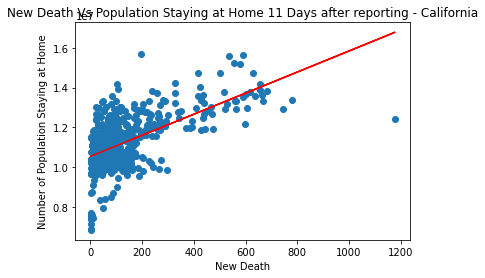

Regression is y = 5310.13x + 10536762.07


In [3]:
# Based on a the Pearson R value displayed in the table, 11 days lag after new death is reported seems to have the strongest correlation. We will select Death 11 days lag as a the number for other other state calculation

x_values = CA_COVID_4["new_death"]
y_values = CA_COVID_4["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_TX = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - California")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_TX}')

In [4]:
#prepare the data for the four other largest state, first by subsetting the data and removing NaN value

TX_COVID_df = covid_df[covid_df['state']== "TX"]
TX_COVID_df_1 = TX_COVID_df[TX_COVID_df['tot_cases']!= 0]
TX_COVID_df_2 = TX_COVID_df_1[TX_COVID_df_1['new_death']> 0]
TX_COVID_df_2['Population_Staying_at_Home_11days'] = TX_COVID_df_2['Population Staying at Home'].shift(periods=11)
TX_COVID_df_3 = TX_COVID_df_2.dropna()

NY_COVID_df = covid_df[covid_df['state']== "NY"]
NY_COVID_df_1 = NY_COVID_df[NY_COVID_df['tot_cases']!= 0]
NY_COVID_df_2 = NY_COVID_df_1[NY_COVID_df_1['new_death']> 0]
NY_COVID_df_2['Population_Staying_at_Home_11days'] = NY_COVID_df_2['Population Staying at Home'].shift(periods=11)
NY_COVID_df_3 = NY_COVID_df_2.dropna()

IL_COVID_df = covid_df[covid_df['state']== "IL"]
IL_COVID_df_1 = IL_COVID_df[IL_COVID_df['tot_cases']!= 0]
IL_COVID_df_2 = IL_COVID_df_1[IL_COVID_df_1['new_death']> 0]
IL_COVID_df_2['Population_Staying_at_Home_11days'] = IL_COVID_df_2['Population Staying at Home'].shift(periods=11)
IL_COVID_df_3 = IL_COVID_df_2.dropna()

FL_COVID_df = covid_df[covid_df['state']== "FL"]
FL_COVID_df_1 = FL_COVID_df[FL_COVID_df['tot_cases']!= 0]
FL_COVID_df_2 = FL_COVID_df_1[FL_COVID_df_1['new_death']> 0]
FL_COVID_df_2['Population_Staying_at_Home_11days'] = FL_COVID_df_2['Population Staying at Home'].shift(periods=11)
FL_COVID_df_3 = FL_COVID_df_2.dropna()

<ipython-input-4-526ce29f0835>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TX_COVID_df_2['Population_Staying_at_Home_11days'] = TX_COVID_df_2['Population Staying at Home'].shift(periods=11)
<ipython-input-4-526ce29f0835>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_COVID_df_2['Population_Staying_at_Home_11days'] = NY_COVID_df_2['Population Staying at Home'].shift(periods=11)
<ipython-input-4-526ce29f0835>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

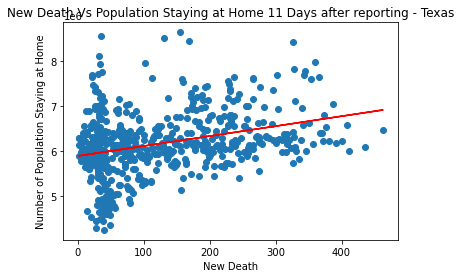

Regression is y = 2216.75x + 5892279.14


In [5]:
#Scatter Plot and Pearson R - Texas
x_values = TX_COVID_df_3["new_death"]
y_values = TX_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_TX = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - Texas")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_TX}')

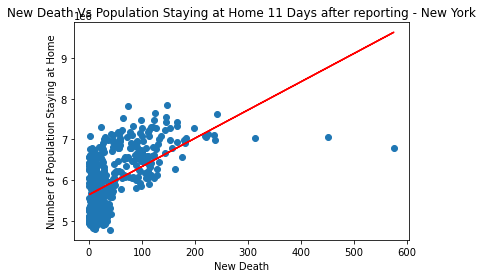

Regression is y = 6952.4x + 5639832.25


In [6]:
#Scatter Plot and Pearson R - New York
x_values = NY_COVID_df_3["new_death"]
y_values = NY_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_NY = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - New York")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_NY}')

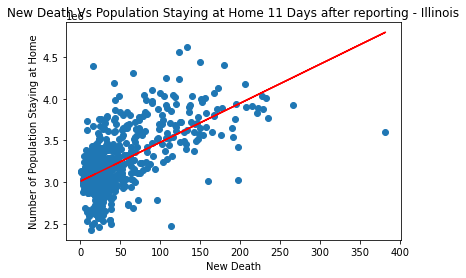

Regression is y = 4683.96x + 3008943.4


In [7]:
#Scatter Plot and Pearson R - Illinois
x_values = IL_COVID_df_3["new_death"]
y_values = IL_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_IL = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - Illinois")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_IL}')

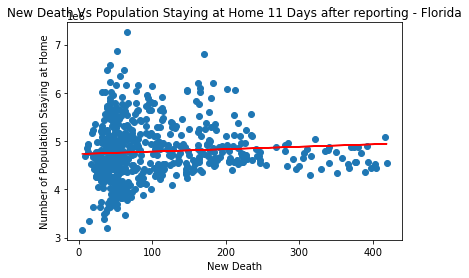

Regression is y = 501.95x + 4732408.67


In [8]:
#Scatter Plot and Pearson R - Florida
x_values = FL_COVID_df_3["new_death"]
y_values = FL_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_FL = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - Florida")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_FL}')

3.Show the difference between the correlation between death report and Population Staying at Home by State.

In [9]:
#putting the calculated Pearson R value into table for comparison

correlation_FL = st.pearsonr(FL_COVID_df_3['new_death'],FL_COVID_df_3['Population_Staying_at_Home_11days'])
correlation_TX = st.pearsonr(TX_COVID_df_3['new_death'],TX_COVID_df_3['Population_Staying_at_Home_11days'])
correlation_IL = st.pearsonr(IL_COVID_df_3['new_death'],IL_COVID_df_3['Population_Staying_at_Home_11days'])
correlation_NY = st.pearsonr(NY_COVID_df_3['new_death'],NY_COVID_df_3['Population_Staying_at_Home_11days'])

CA_R = round(correlation_CA_11[0],4)
TX_R = round(correlation_TX[0],4)
IL_R = round(correlation_IL[0],4)
FL_R = round(correlation_FL[0],4)
NY_R = round(correlation_NY[0],4)


R_list = [['California', CA_R], ['Illinois', IL_R], ['Florida', FL_R], ['New York', NY_R], ['Texas', TX_R]]
R_Table = pd.DataFrame(R_list, columns =['State', 'Pearson-R Value'])
R_Table_Sorted = R_Table.sort_values(["Pearson-R Value"], ascending=False)
R_Table_Sorted

,State,Pearson-R Value
1,Illinois,0.6186
0,California,0.5827
3,New York,0.5164
4,Texas,0.3206
2,Florida,0.0725


<hr><font color="green"><h1>from file: 4 - colin</h1></font>

**Final Hypothesis: Reducing Travel (i.e. staying at home) Reduced COVID**
Owner: Colin, Prina

(Prina) 1) Hypothesis 1: Reducing average trip length (more short trips, fewer long trips) reduced the subsequent COVID-19 Case Count
- Regression

(Colin) 2) Hypothesis 2: Staying at home (higher % staying at home) reduced the subsequent COVID-19 Case Count
- Regression

In [9]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import numpy as np
from pathlib import Path
import os

In [3]:
#DATA READ IN
path = "output_data/consolidated_new.csv"
consolidated = pd.read_csv(path)

path = "output_data/national_covid.csv"
nation = pd.read_csv(path)

In [4]:
#WEEKLY GROUPING
df = consolidated
df["Date"] = df["Date"].astype('datetime64[ns]')
weekly_consolidated = df.groupby("state").resample('W-Wed', label='right', closed = 'right', on='Date').sum().reset_index().sort_values(by='Date')

In [5]:
#DATA CLEANUP, drop partial weeks
weekly_consolidated = weekly_consolidated.drop(['tot_cases%',"tot_death%","Population Staying at Home%","Population Not Staying at Home%"],axis = 1,inplace=False)
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-01-02"]
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-11-24"]

In [6]:
weekly_consolidated["%HOME"] = weekly_consolidated["Population Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["%AWAY"] = weekly_consolidated["Population Not Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["DEATHS"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000
weekly_consolidated["CASES"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000

In [7]:
pre_covid = weekly_consolidated[weekly_consolidated["Date"] <= "2020-03-04"]
post_covid = weekly_consolidated[weekly_consolidated["Date"] > "2020-03-04"]
pre_vaccine = post_covid[post_covid["Date"] <= "2020-12-30"]

pre_covid_avg = pre_covid.groupby("state").mean()
post_covid_avg = post_covid.groupby("state").mean()
pre_vaccine_avg = pre_vaccine.groupby("state").mean()

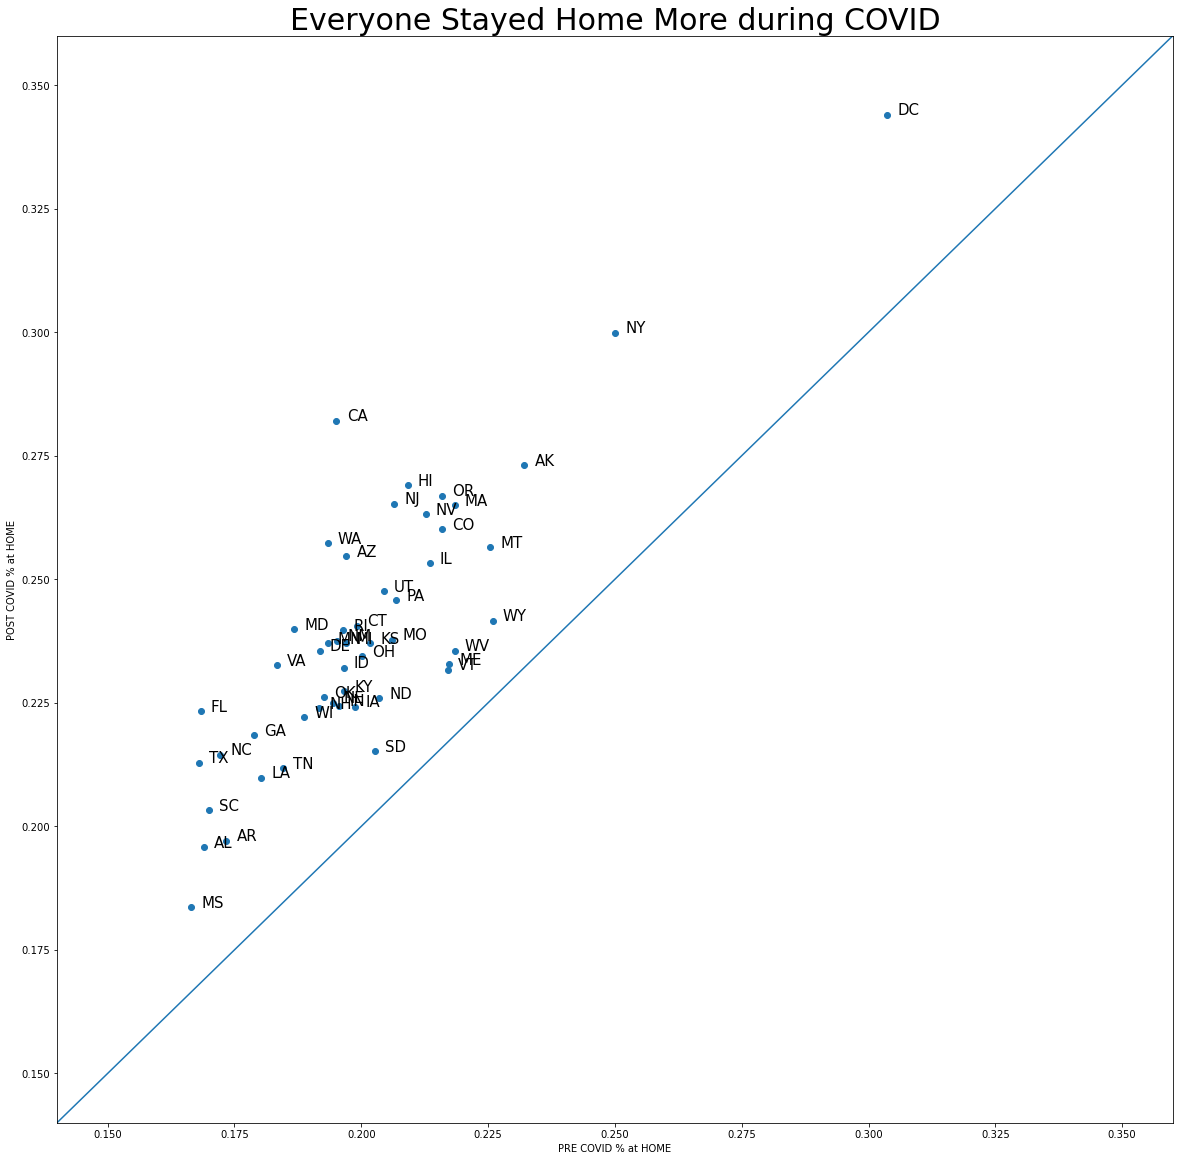

In [8]:
x = pre_covid_avg["%HOME"]
y = post_covid_avg["%HOME"]

plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.axline((0.15,0.15),(.35,.35))
plt.xlabel("PRE COVID % at HOME")
plt.ylabel("POST COVID % at HOME")

labels = post_covid_avg.index

plt.title("Everyone Stayed Home More during COVID",size=30)
for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)

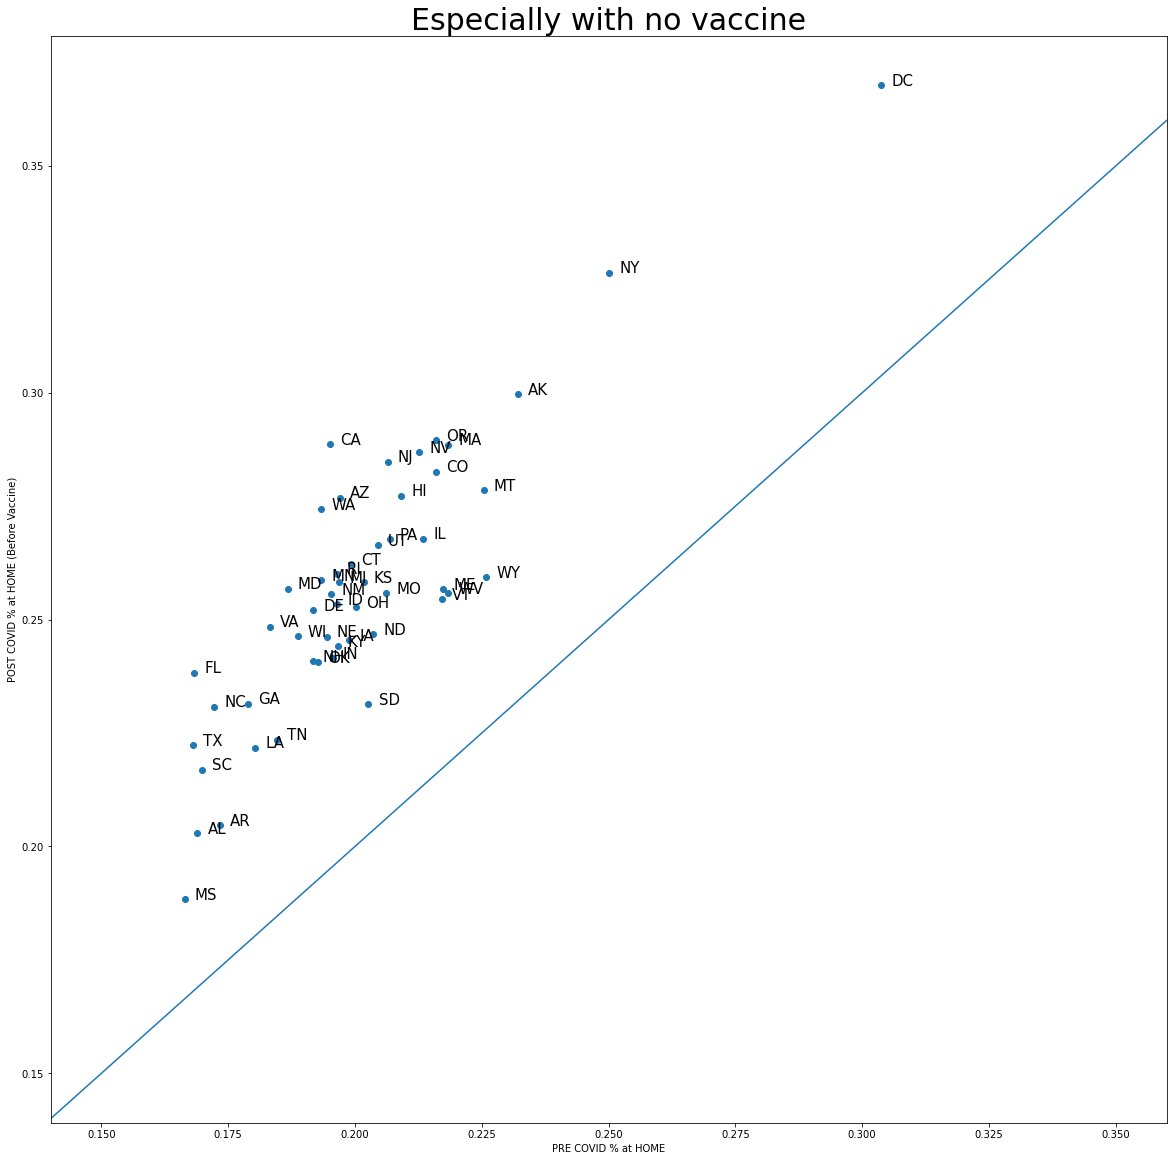

In [11]:
x = pre_covid_avg["%HOME"]
y = pre_vaccine_avg["%HOME"]

plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.axline((0.15,0.15),(.35,.35))
plt.xlabel("PRE COVID % at HOME")
plt.ylabel("POST COVID % at HOME (Before Vaccine)")

labels = post_covid_avg.index

plt.title("Especially with no vaccine",size=30)
for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)

Text(0.5, 1.0, 'Everyone Stayed Home More during COVID')

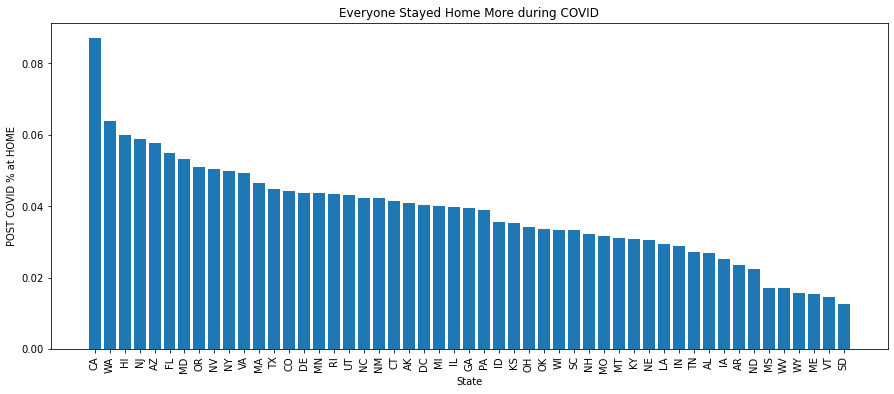

In [12]:
delta = pre_covid_avg["%HOME"] - post_covid_avg["%HOME"]
delta = delta.sort_values(ascending=True)

y=-delta
x=delta.index

plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("POST COVID % at HOME")
plt.title("Everyone Stayed Home More during COVID")

Text(0.07, 12, 'Std Err = 62.882382415744964')

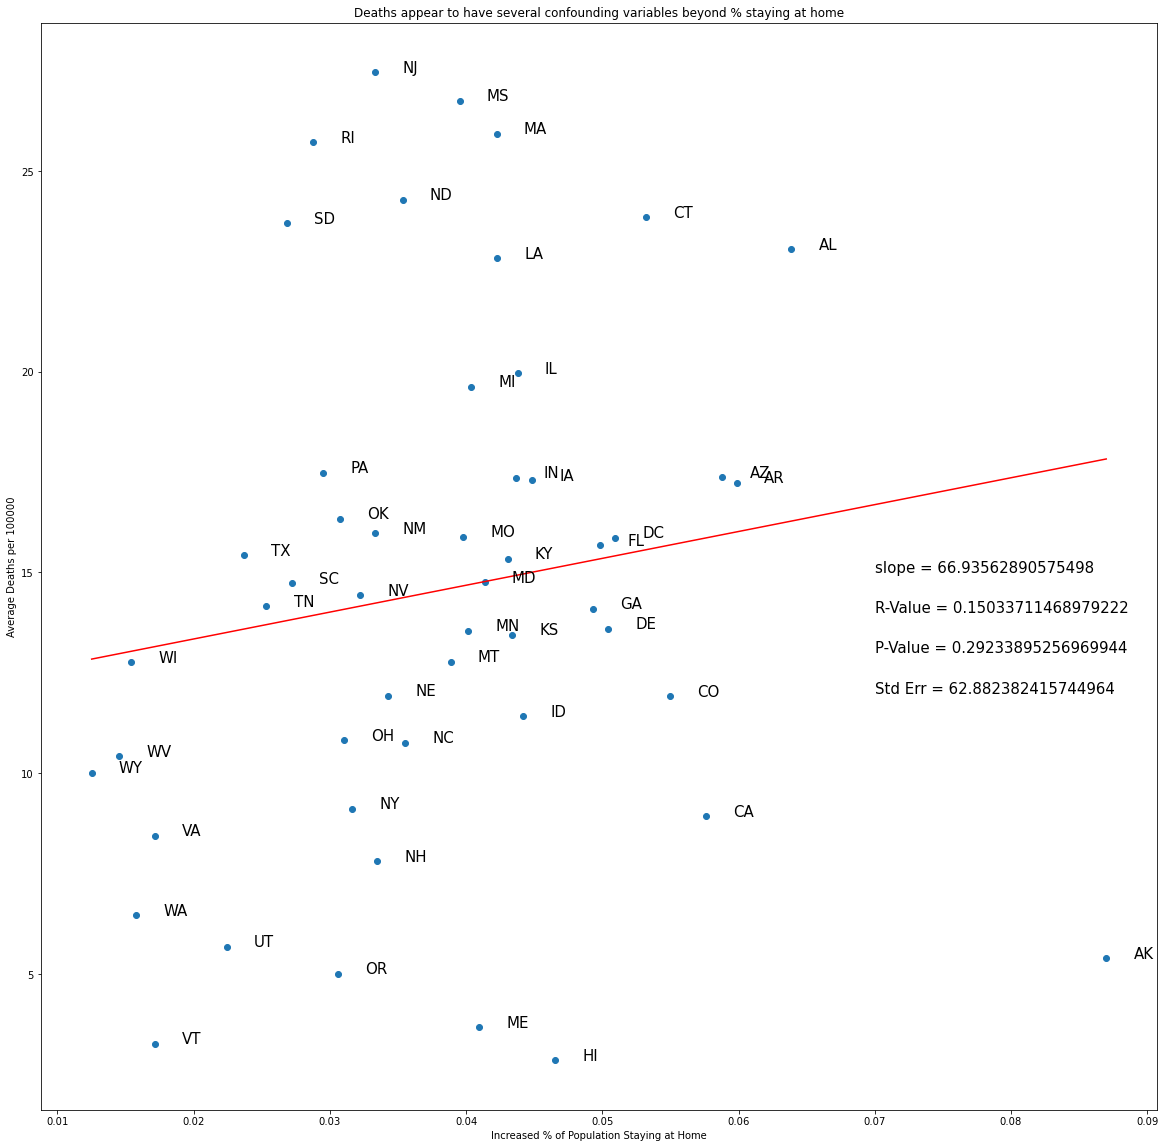

In [20]:
#NOTE: 43 weeks in "pre-vaccine", 90 weeks in "post-covids"

infections = pre_vaccine_avg["DEATHS"] * 43 #multiply 90 because 90 weeks
x = -delta
y = infections
plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.xlabel("Increased % of Population Staying at Home")
plt.ylabel("Average Deaths per 100000")
plt.title("Deaths appear to have several confounding variables beyond % staying at home")
labels = post_covid_avg.index

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.text(.07,15,f"slope = {slope}",size=15)
plt.text(.07,14,f"R-Value = {r_value}",size=15)
plt.text(.07,13,f"P-Value = {p_value}",size=15)
plt.text(.07,12,f"Std Err = {std_err}",size=15)

Text(0.32, 12, 'Std Err = 29.00007247569733')

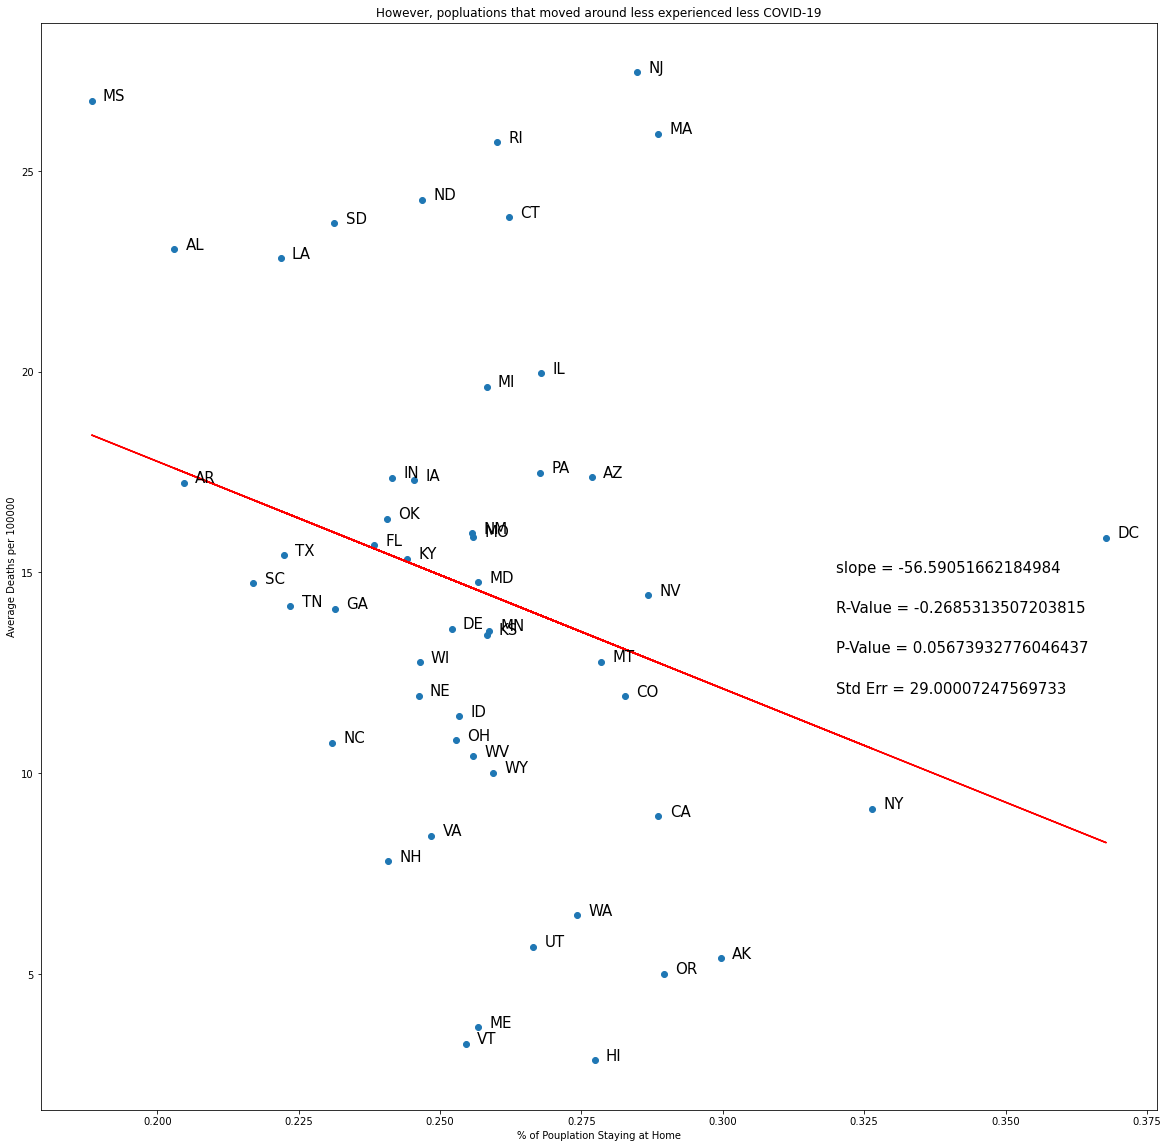

In [23]:
#DIVIDE 
infections = pre_vaccine_avg["DEATHS"] * 43 #multiply 90 because 90 weeks
x = pre_vaccine_avg["%HOME"]
y = infections
plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.xlabel("% of Pouplation Staying at Home")
plt.ylabel("Average Deaths per 100000")
plt.title("However, popluations that moved around less experienced less COVID-19")
labels = post_covid_avg.index

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.text(.32,15,f"slope = {slope}",size=15)
plt.text(.32,14,f"R-Value = {r_value}",size=15)
plt.text(.32,13,f"P-Value = {p_value}",size=15)
plt.text(.32,12,f"Std Err = {std_err}",size=15)

<hr><font color="green"><h1>from file: 5 - prina</h1></font>

**Final Hypothesis: Reducing Travel (i.e. staying at home) Reduced COVID**

(Prina) 1: Hypothesis 1: Reducing number of trips reduced the subsequent COVID-19 Case Count - Regression

The purpose of this study is to prove that NULL Hypothesies is not true on New COVID cases changed due to number of trips people travelled

Steps taken for this analysis:

1) after_covid data is used for this analysis
2) Heatmap is created to show that highly corelated data should not be paired together.Result saved in output_data/Corr_heatmap.png
3) Regplot to show that the data is Linear.The straight line shows that the data is linear. Result saved in output_data/Plot_Linear_regression.png
4) Linear Regression is run on "New COVID Cases" and "Number of Trips". Train data is 80% and Validation(Test) data is 20%
   Training R^2 score,Validation R^2 score and Feature coefficient results is printed
5) Residual plot to prove the Linear Regression is created. The result is saved as is saved as output_data/Residual_Plot.png
6) Fancy residual plot using Visualizer is created to prove the Linear Regression. The result is saved as is saved as output_data/visualizer_residual_plot.png
7) QQ-Plot and Histogram is created to show that the results are left-skewed. The results is saved as output_data/QQ-Plot.png

In [94]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import RadViz

In [95]:
#Read After Covid Data and display rows
path = "output_data/after_covid.csv"
after_covid_df = pd.read_csv(path, encoding="UTF-8")
after_covid_df.head()

,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,CA,3570660,2234,58090,154,2021-04-01,11474065.0,28038158.0,107561279.0,29778606.0,26282896.0,12531005.0,15269950.0,14726338.0,5657090.0,2044897.0,918115.0,239073.0,113309.0
1,CA,3685032,644,62011,5,2021-05-31,10587959.0,28924264.0,121673931.0,38312879.0,30569304.0,14023600.0,15608127.0,14034739.0,5227230.0,2354560.0,1178859.0,254375.0,110258.0
2,NE,0,0,0,0,2020-02-06,354678.0,1574590.0,7285139.0,1853508.0,1951163.0,911062.0,1085616.0,899487.0,324464.0,160810.0,74008.0,16664.0,8357.0
3,ME,3910,22,123,2,2020-07-30,307281.0,1031123.0,4273710.0,934145.0,974133.0,527005.0,653197.0,726190.0,291651.0,114691.0,40709.0,6813.0,5176.0
4,MS,280182,1059,6730,13,2021-02-02,465635.0,2520895.0,10637591.0,2451371.0,2376422.0,1244226.0,1733520.0,1809314.0,679235.0,243345.0,81689.0,15460.0,3009.0


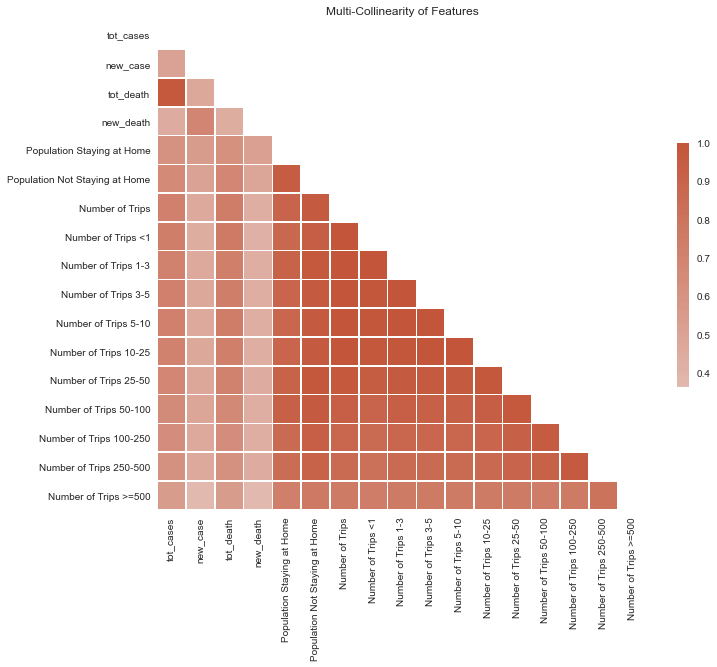

In [96]:
#As the color becomes darker that means that those variables are more highly correlated and should not be paired together in the same model.

#Correlation matrix:
final_corr= after_covid_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(final_corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(final_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Multi-Collinearity of Features')
plt.show()

#The heatmap is saved as output_data/Corr_heatmap.png

In [97]:
#Creating List for Linear Regression model:

y=after_covid_df[['new_case']]
x=after_covid_df[['Number of Trips']]

<AxesSubplot:xlabel='new_case', ylabel='Number of Trips'>

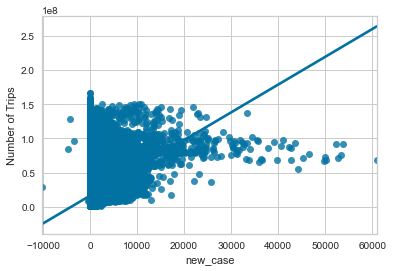

In [98]:
# use regplot to show that the data is Linear.The straight line shows that the data is linear
sns.regplot(x = "new_case",
            y = "Number of Trips", 
            ci = None,
            data = after_covid_df)
# The regplot is saved in output_data/Plot_Linear_regression.png

In [99]:
#Linear Regression. Finding R^2 score for Training and Validation Data
#Training data size is 80%
#Validation data size is 20%

X_train, X_val, y_train, y_val=train_test_split(x,y,test_size=0.2,random_state=42)

lr_model = LinearRegression()

fit = lr_model.fit(X_train,y_train)

train_score=lr_model.score(X_train,y_train)

val_score=lr_model.score(X_val,y_val)

print('Training R^2 score was:', train_score ,' which shows low corelation in train score')
print('Validation R^2 score was:', val_score,' which shows low corelation in validation score')
print('Feature coefficient results:', lr_model.coef_,' real number is = 0.0000534177865')

Training R^2 score was: 0.21733333472916216  which shows low corelation in train score
Validation R^2 score was: 0.2112049904505935  which shows low corelation in validation score
Feature coefficient results: [[5.34177865e-05]]  real number is = 0.0000534177865


0.2112049904505935


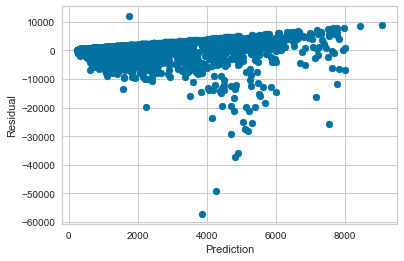

In [100]:
#Create residual plot for validation dataset:
#A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable
# If the plot shows random pattern then the data is good fit for Linear model

y_predict=lr_model.predict(X_val).tolist()
y_predict10=[]
for item in y_predict:
    for j in item:
        y_predict10.append(j)
print(fit.score(X_val,y_val))
resid=y_predict10-y_val.new_case ## standardize the observation
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.scatter(lr_model.predict(X_val), resid)
plt.show()

# Output of Residual Plot is saved as output_data/Residual_Plot.png

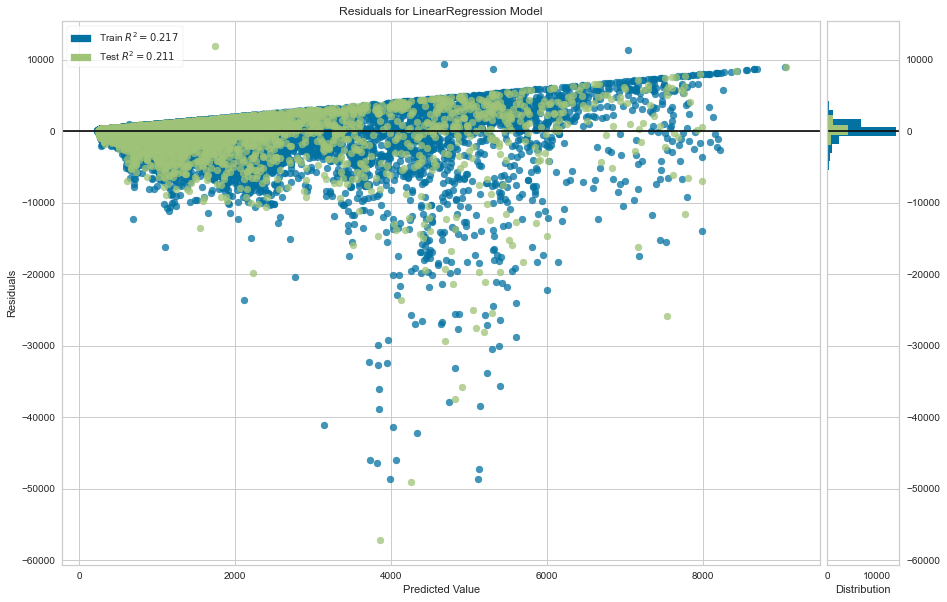

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
#Create fancy Residual plot for better visualization:

visualizer = RadViz(size=(1080, 720)) # Size the plot
visualizer = ResidualsPlot(lr_model, hist=True) # draw the plot using Linear Regression
visualizer.fit(X_train,y_train) # Fit the training data to the visualizer
visualizer.score(X_val,y_val) # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

# Visualizer Output is saved as output_data/visualizer_residual_plot.png

Conclusion:

#   The fact that residuals are scattered randomly across the horizontal axis indicates that the linear model is adequate for the data. If there is a pattern in the residuals, we may conclude that the linear model is not the best option and that a non-linear model is required.

<ipython-input-102-68ba810b9724>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels("Theoretical Quantile",fontsize=8)
<ipython-input-102-68ba810b9724>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels("Ordered Values",fontsize=8)


Text(0.5, 1.0, 'Residual Histogram')

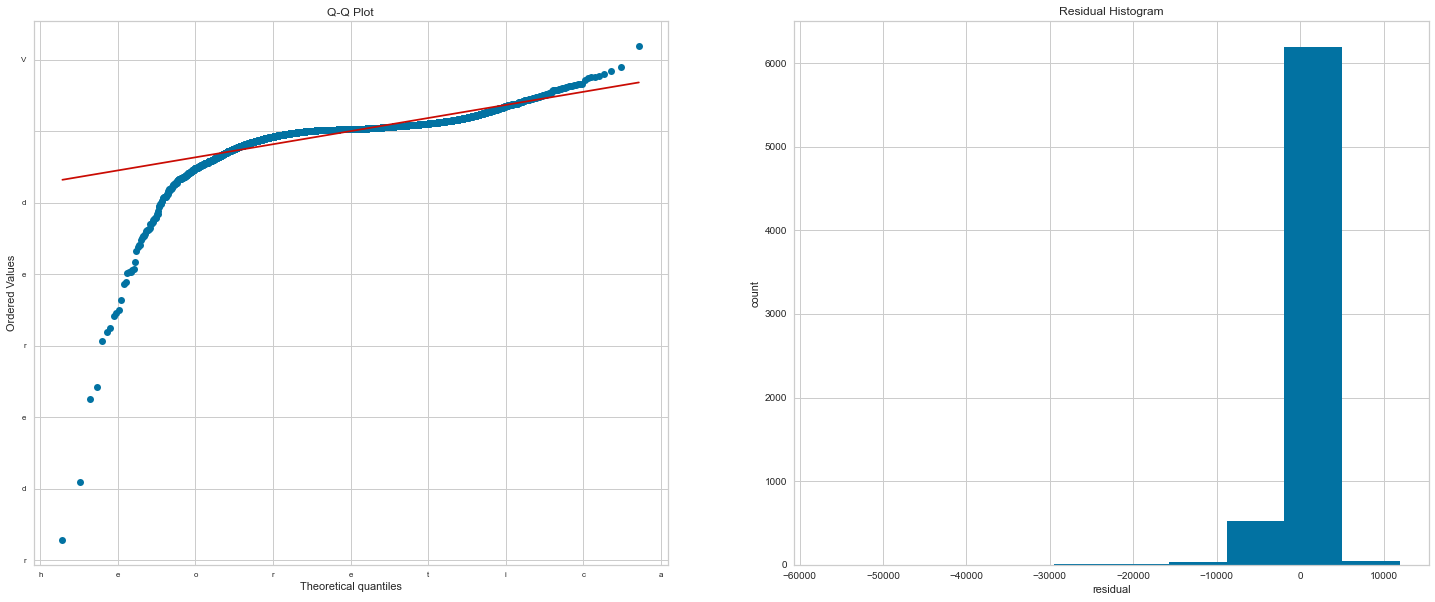

In [102]:
# QQ Plot and residual histogram:

a4_dims = (25, 10)
f, ax = plt.subplots(1,2,figsize=a4_dims)
z = resid # standardize the observation

stats.probplot(z, dist="norm", plot=ax[0])
ax[0].set_title("Residual")
ax[0].set_title("Q-Q Plot")
ax[0].set_xticklabels("Theoretical Quantile",fontsize=8)
ax[0].set_yticklabels("Ordered Values",fontsize=8)
ax[1].hist(z)
ax[1].set_xlabel("residual")
ax[1].set_ylabel("count")
ax[1].set_title("Residual Histogram")

# Output of QQ-Polt and Histrogram is saved as output_data/QQ-Plot.png

Conclusion: 
    The conclusion is that number of trips do not drive new cases. Hence, the hypothesies is not NULL.
    
    If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution is left-skewed (or negatively skewed). This means that the data is not normally distributed